# Basic Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
from skimage.io import imread_collection

# Importing an image from an external source

In [99]:
# image = io.imread('./images/Abyssinian_1.jpg')
# plt.imshow(image);
pictures = io.ImageCollection('./images/Abyssinian_1.jpg:./images/Abyssinian_2.jpg')
seq = imread_collection('./images/*', conserve_memory=True)
# print(plt.imshow(seq[0]))
# for i in range(1,10):
#     print(plt.imshow(seq[i]))
# бинарная маска для сегментации

In [110]:
new_none=[]
for i in range(5):
    img=(seq[i])
    image_gray = color.rgb2gray(img) 
    image_gray1 = img_as_ubyte(image_gray)
    new_none.append(image_gray1)
    # image_show(image_gray1);
# for i in new_none:
#     print(image_show(i))

# Texture Detection(Entropy)


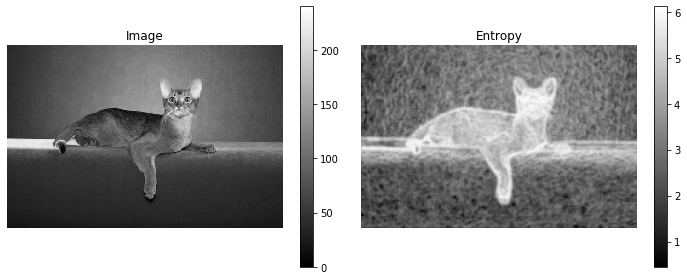

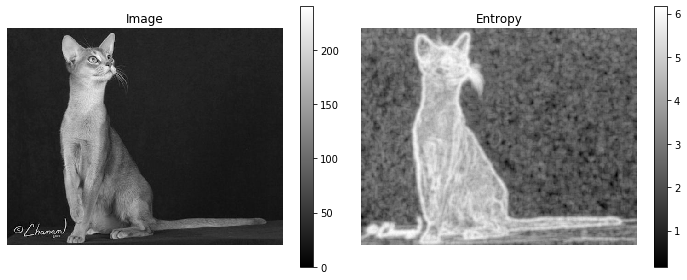

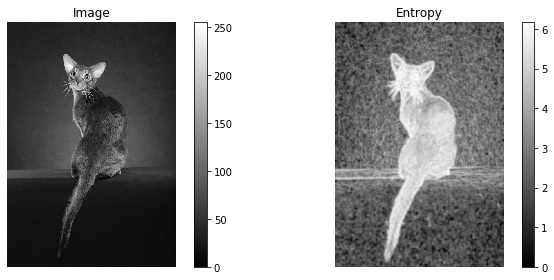

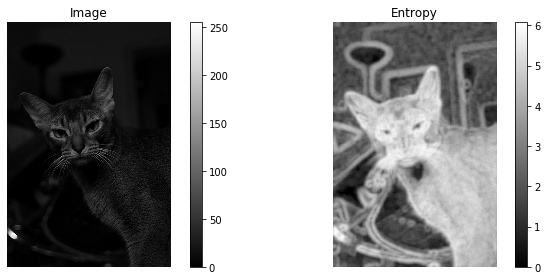

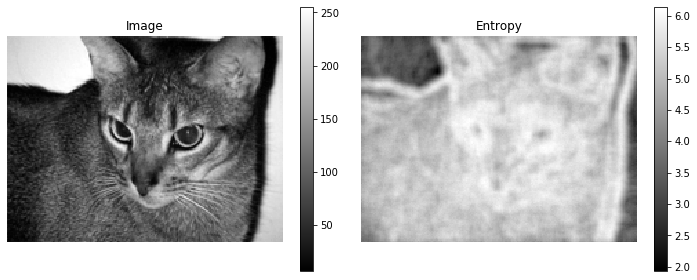

In [266]:
for i in range(len(new_none)):
    image=new_none[i]
    fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(10, 4))

    img0 = ax0.imshow(image, cmap=plt.cm.gray)
    ax0.set_title("Image")
    ax0.axis("off")
    fig.colorbar(img0, ax=ax0)

    img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
    ax1.set_title("Entropy")
    ax1.axis("off")
    fig.colorbar(img1, ax=ax1)

    fig.tight_layout()
    plt.show()

# A simple function to plot the images

In [145]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

# for i in range(len(new_none)):
#     image_show(new_none[i])

# img_threshold1 = filters.threshold_local(image_gray1,block_size=51, offset=10)
# image_show(image_gray1 >img_threshold1)

# fig, ax = plt.subplots(1, 1)
# ax.hist(img_threshold1.ravel(), bins=32, range=[0, 256])
# ax.set_xlim(0, 256);

# Local Thresholding

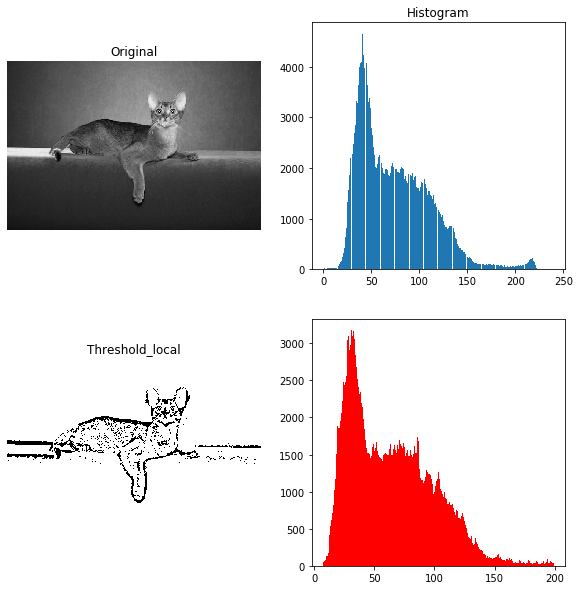

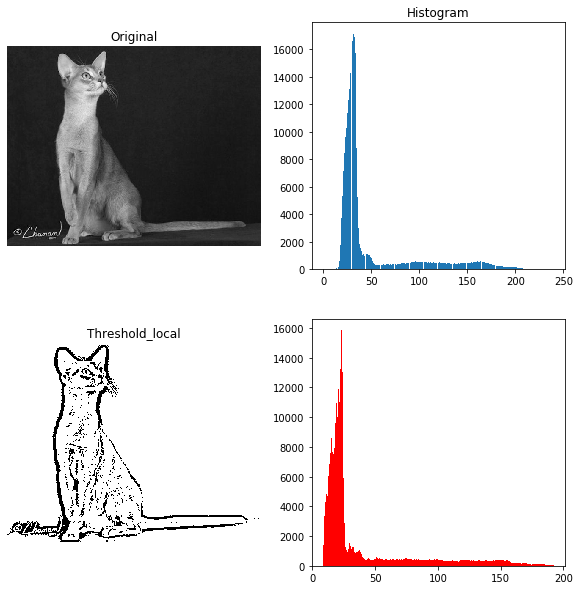

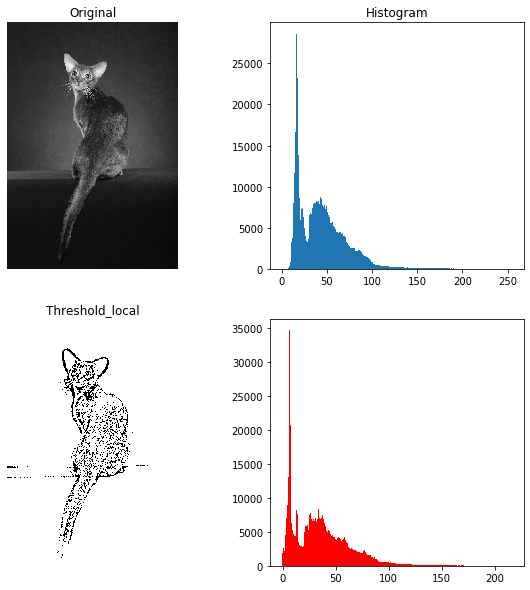

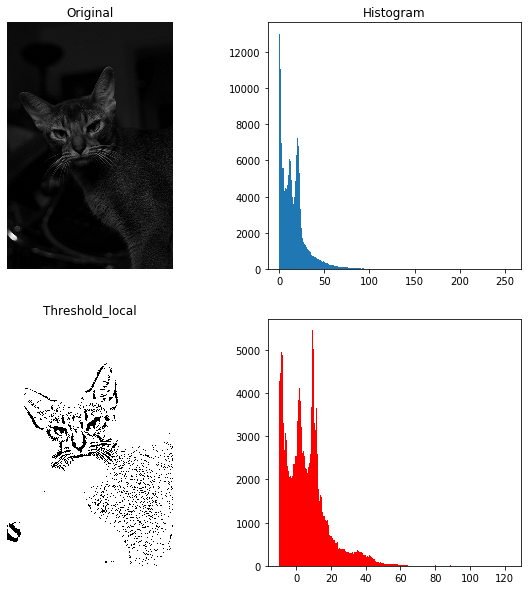

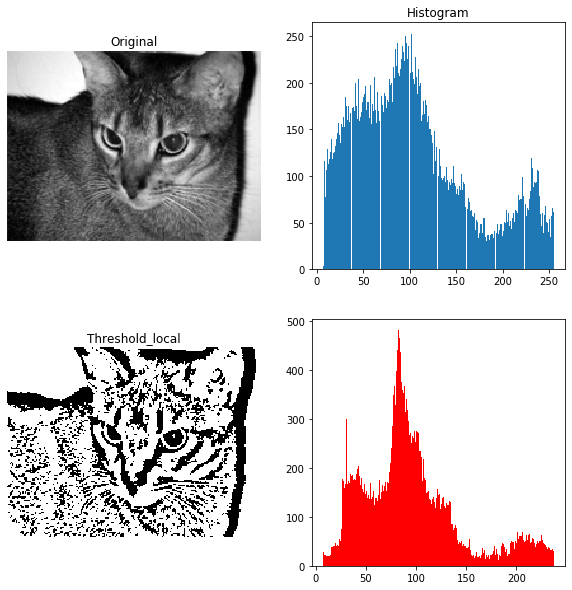

In [173]:
from skimage.filters import threshold_local

for i in range(len(new_none)):
    image = new_none[i]
    
    block_size = 35
    local_thresh = threshold_local(image, block_size, offset=10)
    binary_local = image > local_thresh

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    ax[0, 0].imshow(image, cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[0, 1].hist(image.ravel(), bins=256)
    ax[0, 1].set_title('Histogram')

    ax[1, 0].imshow(binary_local, cmap=plt.cm.gray)
    ax[1, 0].set_title('Threshold_local')

    ax[1, 1].hist(local_thresh.ravel(), bins=256, color='r')
#     ax[1, 1].axvline(local_thresh, color='r')

    for a in ax[:, 0]:
        a.axis('off')
plt.show()

# Otsu Thresholding

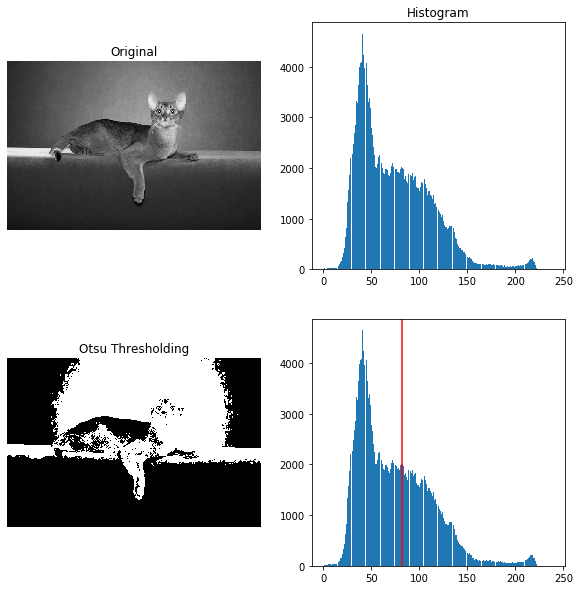

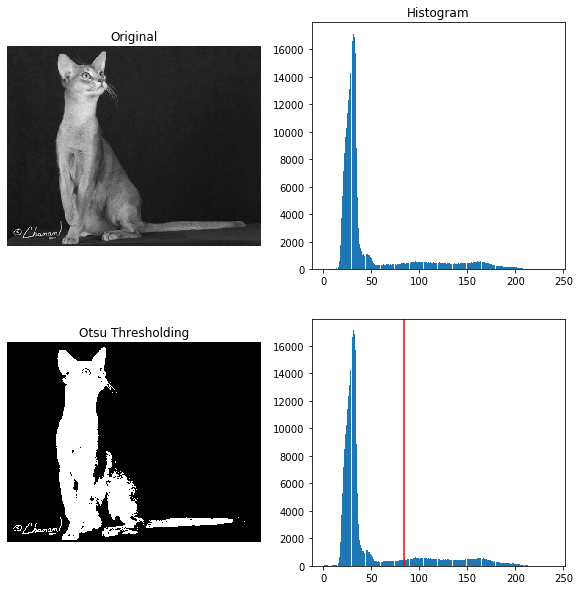

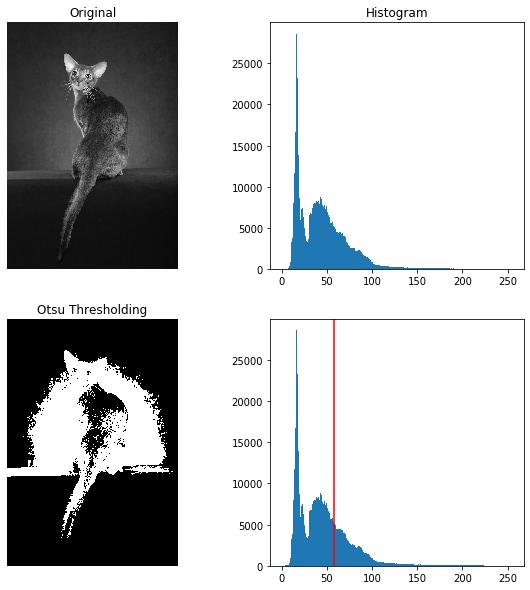

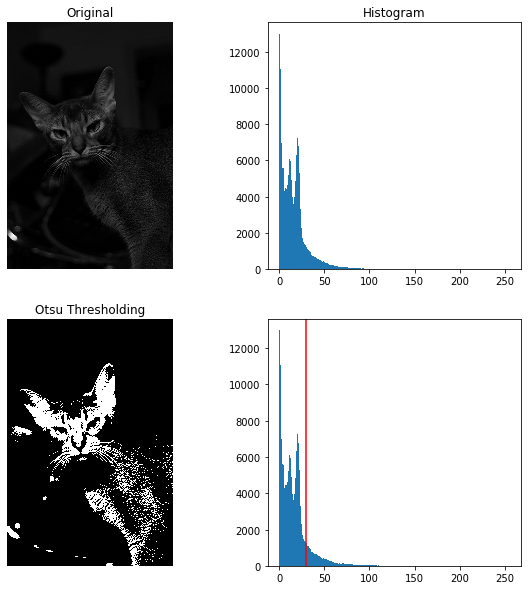

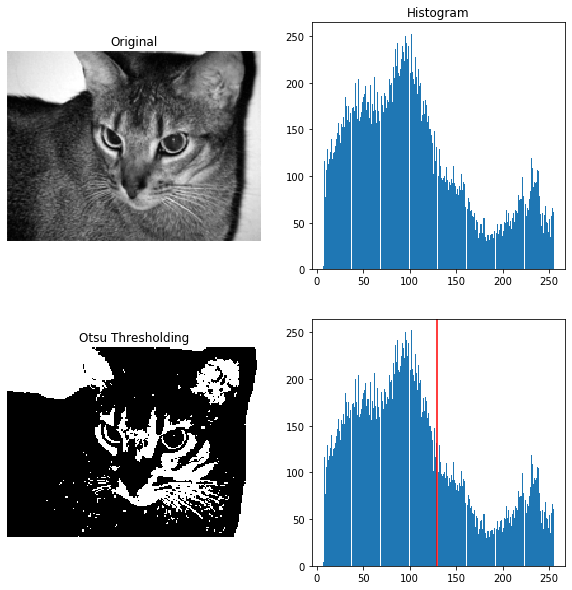

In [187]:
from skimage.filters import threshold_otsu
for i in range(len(new_none)):
        image = new_none[i]
        
        thresh = threshold_otsu(image)
        binary = image > thresh

        fig, ax = plt.subplots(2, 2, figsize=(10, 10))

        ax[0, 0].imshow(image, cmap=plt.cm.gray)
        ax[0, 0].set_title('Original')

        ax[0, 1].hist(image.ravel(), bins=256)
        ax[0, 1].set_title('Histogram')

        ax[1, 0].imshow(binary, cmap=plt.cm.gray)
        ax[1, 0].set_title('Otsu Thresholding')

        ax[1, 1].hist(image.ravel(), bins=256)
        ax[1, 1].axvline(thresh, color='r')

        for a in ax[:, 0]:
            a.axis('off')
        plt.show()

# Minimum Thresholding

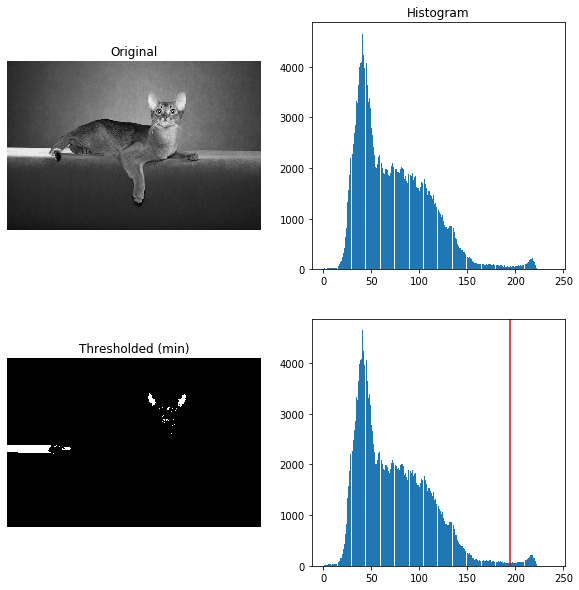

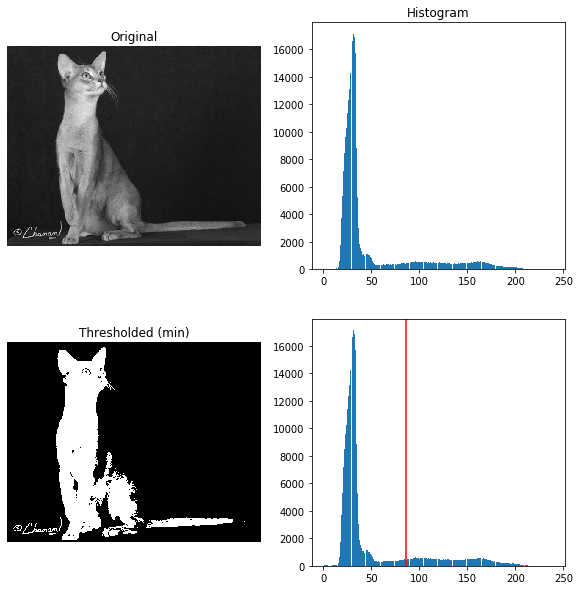

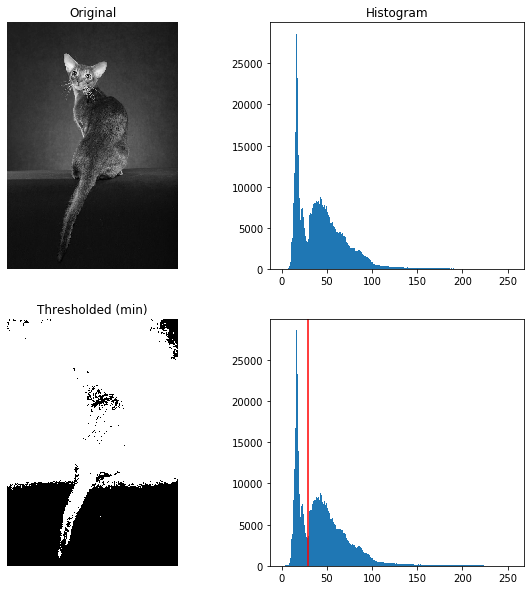

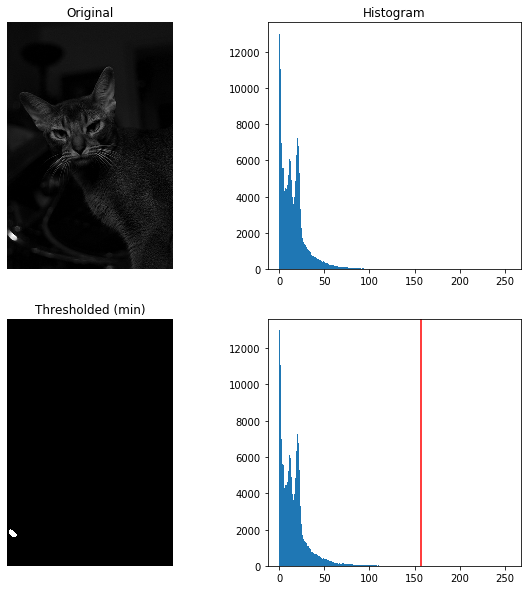

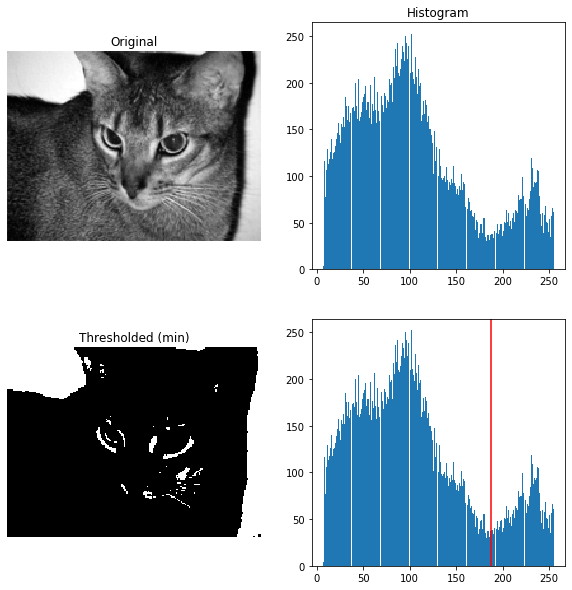

In [176]:
from skimage.filters import threshold_minimum
for i in range(len(new_none)):
        image = new_none[i]

        thresh_min = threshold_minimum(image)
        binary_min = image > thresh_min

        fig, ax = plt.subplots(2, 2, figsize=(10, 10))

        ax[0, 0].imshow(image, cmap=plt.cm.gray)
        ax[0, 0].set_title('Original')

        ax[0, 1].hist(image.ravel(), bins=256)
        ax[0, 1].set_title('Histogram')

        ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
        ax[1, 0].set_title('Thresholded (min)')

        ax[1, 1].hist(image.ravel(), bins=256)
        ax[1, 1].axvline(thresh_min, color='r')

        for a in ax[:, 0]:
            a.axis('off')
        plt.show()

# Li Thresholding

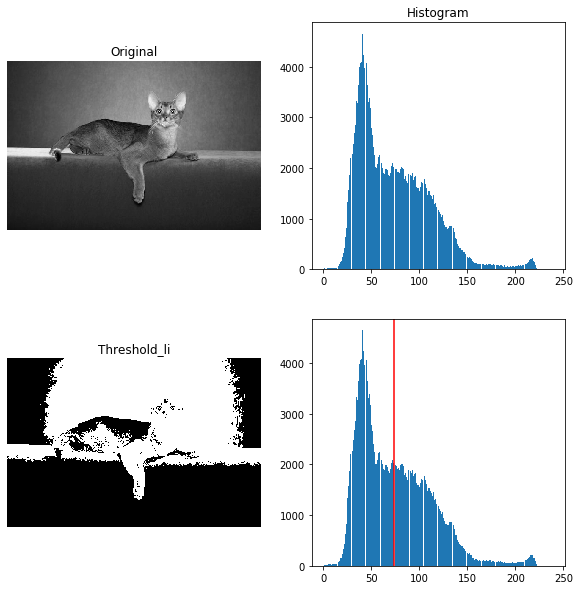

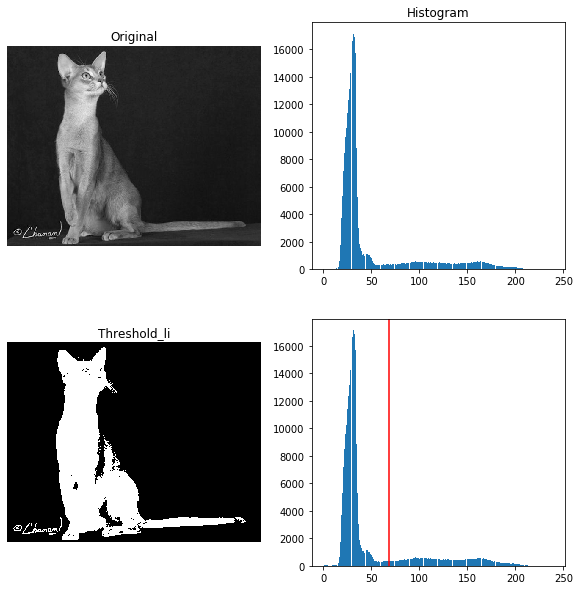

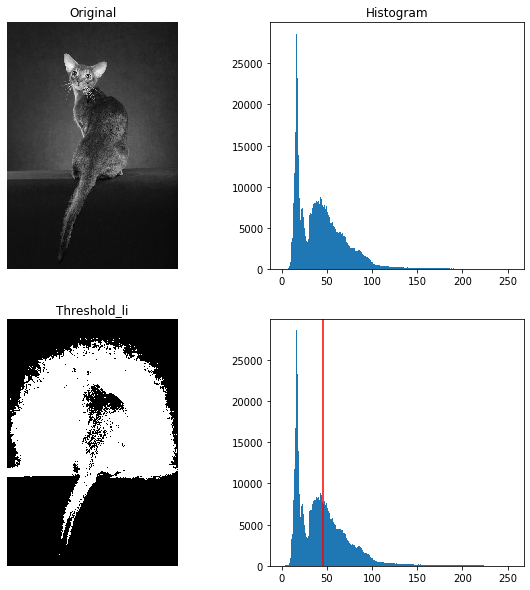

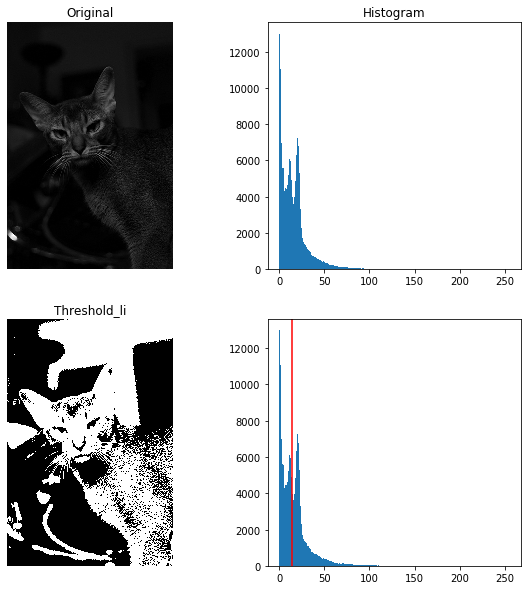

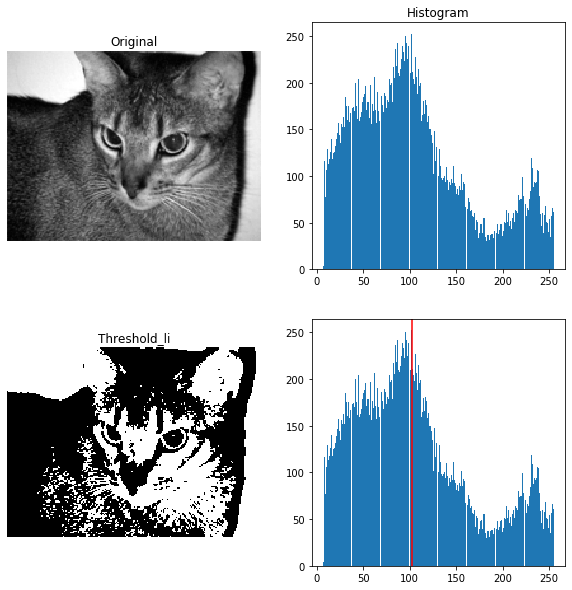

In [181]:
from skimage.filters import threshold_li

for i in range(len(new_none)):
    image = new_none[i]
    
    block_size = 35
    li_thresh = threshold_li(image)
    binary_li = image > li_thresh

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    ax[0, 0].imshow(image, cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[0, 1].hist(image.ravel(), bins=256)
    ax[0, 1].set_title('Histogram')

    ax[1, 0].imshow(binary_li, cmap=plt.cm.gray)
    ax[1, 0].set_title('Threshold_li')

    ax[1, 1].hist(image.ravel(), bins=256)
    ax[1, 1].axvline(li_thresh, color='r')

    for a in ax[:, 0]:
        a.axis('off')
plt.show()

# Supervised segmentation

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


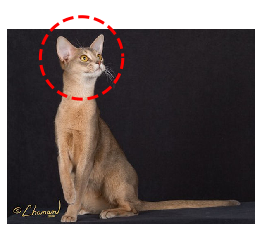

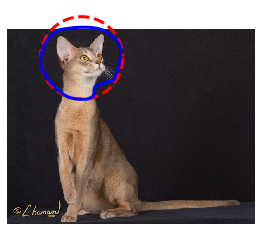

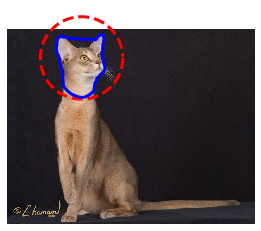

In [267]:
img=(seq[1])
image_gray = color.rgb2gray(img) 
image_gray1 = img_as_ubyte(image_gray)

def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    return np.array([c, r]).T


points = circle_points(200, [70, 180], 100)[:-1]
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

snake = seg.active_contour(image_gray1, points)
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

snake = seg.active_contour(image_gray1, points,alpha=0.06,beta=0.3)
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);
